In [12]:
#pip install -e .

In [13]:
import numpy as np
import NeuralNetworkLibrary as dnn
import matplotlib.pyplot as plt
from scipy.io import loadmat

np.random.seed(42)


# Main

In [40]:
def main():
    """
    activationFunction()
    neural_network = NeuralNetwork(input_size = 2,
                                layer_sizes = [2],
                                output_size = 1,
                                activation_funcs = [Swish(),Logsig()],
                                wInit = 'nguyen')

    # Carga el archivo .mat
    inputs = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
    targets =np.array([[0],
              [1],
              [1],
              [0]])
    for weight in neural_network.weights:
        print(f"Tamano de los pesos: {weight.shape}")
    
    Optimizador = RmsProp(nn=neural_network,
                          inputs=inputs,
                          targets=targets,
                          lr=1e-2,
                          maxEpochs=500,
                          show=50,
                          consecutive_epochs=20,
                          goal=1e-4,
                          mingrad=1e-8,
                          batch_size=1,
                          error_fun=ErrorFunctions.MSE)
    
    perfs,epochs = Optimizador.optimize()
    """
    
    dnn.activationFunction()
    neural_network = dnn.NeuralNetwork(input_size = 2,
                                layer_sizes = [30,30,30],
                                output_size = 2,
                                activation_funcs = [dnn.Relu(),dnn.Relu(),dnn.Relu(),dnn.Purelin()],
                                wInit = 'nguyen',
                                dropout_rate=0.05,
                                regularization='L2')

    # Carga el archivo .mat
    data = loadmat('engine_dataset.mat')
    inputs = data['engineInputs'].T
    targets = data['engineTargets'].T
    
    print("============= DATA BEFORE ================= ")
    dnn.printData(inputs,targets)
    inputs,targets = dnn.min_max(inputs,targets)
    print("============= DATA AFTER  =================")
    dnn.printData(inputs,targets)
    
    Optimizador = dnn.AdamW(nn=neural_network,
                          inputs=inputs,
                          targets=targets,
                          lr=1e-2,
                          maxEpochs=5000,
                          show=200,
                          consecutive_epochs=10,
                          mingrad=1e-8,
                          batch_size=100,
                          error_fun=dnn.ErrorFunctions.MAE)
    
    perfs,epochs = Optimizador.optimize()
    
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, perfs)
    plt.title('Performance')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
    print(perfs)
    """     
    outputs = neural_network.forwardPass(inputs,False)
    print(f"Salida:{outputs}")
    print("Predicción binaria:")
    for fila in outputs.T:  # Iterar sobre las filas de la matriz de salida
        for valor in fila:
            if valor > 0.5:
                print("1", end=" ")
            else:
                print("0", end=" ")
    resultado_esperado = [0, 1, 1, 0]
    print("\nResultado esperado:\n ", resultado_esperado)
    """

# DO MAIN

============= DATA BEFORE ================= 
Estadísticas de los datos de entrada:
Media: [ 141.23511259 1259.53911593]
Desviación estándar: [ 90.67771106 354.62917678]
Mínimo: [  0.6 576.2]
Máximo: [ 314.  1801.8]

Estadísticas de los datos de salida:
Media: [754.19974979 961.74895746]
Desviación estándar: [548.43987051 465.9340708 ]
Mínimo: [-176.7    0. ]
Máximo: [1784.3 1774. ]
============= DATA AFTER  =================
Estadísticas de los datos de entrada:
Media: [0.44873999 0.55755476]
Desviación estándar: [0.28933539 0.28935148]
Mínimo: [0. 0.]
Máximo: [1. 1.]

Estadísticas de los datos de salida:
Media: [0.47470665 0.54213583]
Desviación estándar: [0.27967357 0.26264604]
Mínimo: [0. 0.]
Máximo: [1. 1.]


trainAdamW: Epoch  0 / 5000 , Performance 3.354e+02 / 1e-08 , Gradient 7.401e+08 / 1e-08
trainAdamW: Epoch  200 / 5000 , Performance 2.594e+01 / 1e-08 , Gradient 1.251e+06 / 1e-08
trainAdamW: Epoch  400 / 5000 , Performance 4.983e+00 / 1e-08 , Gradient 2.602e+04 / 1e-08
trainA

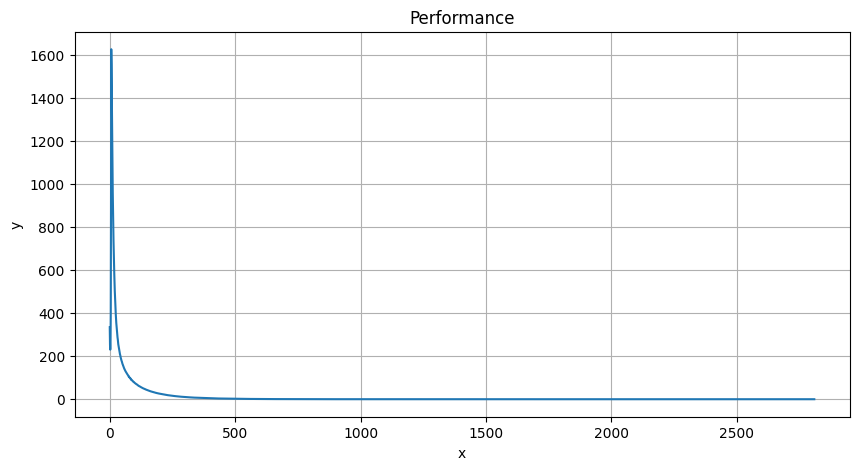

[335.44421637 252.15680938 230.87752671 ...   0.5084481    0.508448
   0.50844791]


In [41]:
if __name__ == '__main__':
    main()